In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import glob
import os

One study has suggested that, when the supplied sound was music as opposed to white noise or tones, there was no effect on body sway.
Others have suggested that the type of music might matter with one study demonstrating that listening to Mozart’s Jupiter reduced body sway compared to other pieces of music [7] and another suggesting that increasing the groove supplied by the music would increase body sway [8].

My is left to right

Mx is back and forth

In [27]:
# eyes closed while listening to Mozart's Jupiter as its loudness shifted at 0.1Hz.
ecl1_s1 = pd.read_csv('../data/S1/ECL1.csv')
# viewing the VR environment while listening to Mozart's Jupiter as its loudness shifted at 0.1 Hz.
wol1_s1 = pd.read_csv('../data/S1/WOL1.csv')
wol1_s2 = pd.read_csv('../data/S2/WOL1.csv')
# viewing the VR environment while listening to Mozart's Jupiter as its loudness shifted at 0.25 Hz.
wol2_s1 = pd.read_csv('../data/S1/WOL2.csv')
wol2_s2 = pd.read_csv('../data/S2/WOL2.csv')

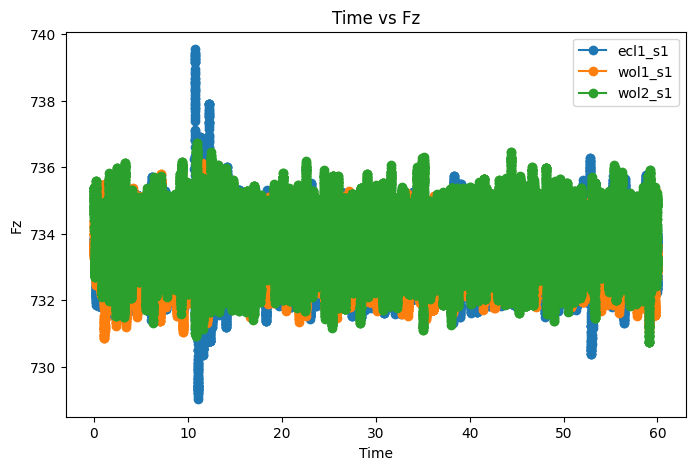

In [17]:
plt.figure(figsize=(8, 5))

plt.plot(ecl1_s1['Time'], ecl1_s1['Fz'], marker='o', linestyle='-', label='ecl1_s1')
plt.plot(wol1_s1['Time'], wol1_s1['Fz'], marker='o', linestyle='-', label='wol1_s1')
plt.plot(wol2_s1['Time'], wol2_s1['Fz'], marker='o', linestyle='-', label='wol2_s1')

plt.xlabel('Time')
plt.ylabel('Fz')
plt.title('Time vs Fz')
plt.legend()  

plt.show()


In [20]:
# fig = go.Figure()

# fig.add_trace(go.Scatter(x=ecl1_s1['Time'], y=ecl1_s1['Fz'], mode='lines+markers', name='ecl1_s1'))
# fig.add_trace(go.Scatter(x=wol1_s1['Time'], y=wol1_s1['Fz'], mode='lines+markers', name='wol1_s1'))
# fig.add_trace(go.Scatter(x=wol2_s1['Time'], y=wol2_s1['Fz'], mode='lines+markers', name='wol2_s1'))

# fig.update_layout(
#     title='Time vs Fz',
#     xaxis_title='Time',
#     yaxis_title='Fz',
#     legend_title='Datasets'
# )

# fig.show()


In [21]:
wol1_s1

,Time,Fz,Mx,My,CoPx,CoPy
0,0.000,733.272065,62.136905,-7.960887,0.010857,0.084739
1,0.001,733.555375,62.157095,-8.027367,0.010943,0.084734
2,0.002,733.550945,62.117355,-8.028437,0.010945,0.084680
3,0.003,733.455725,62.097465,-8.006077,0.010916,0.084664
4,0.004,733.645245,62.098245,-8.005187,0.010912,0.084643
...,...,...,...,...,...,...
59992,59.992,733.644715,62.062005,-7.564507,0.010311,0.084594
59993,59.993,733.551845,62.081595,-7.542747,0.010282,0.084632
59994,59.994,733.647065,62.101485,-7.565107,0.010312,0.084648
59995,59.995,733.647065,62.101485,-7.565107,0.010312,0.084648


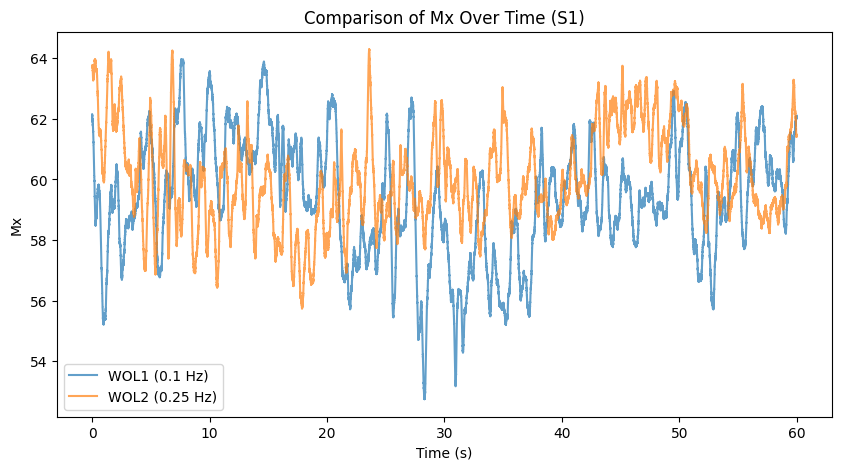

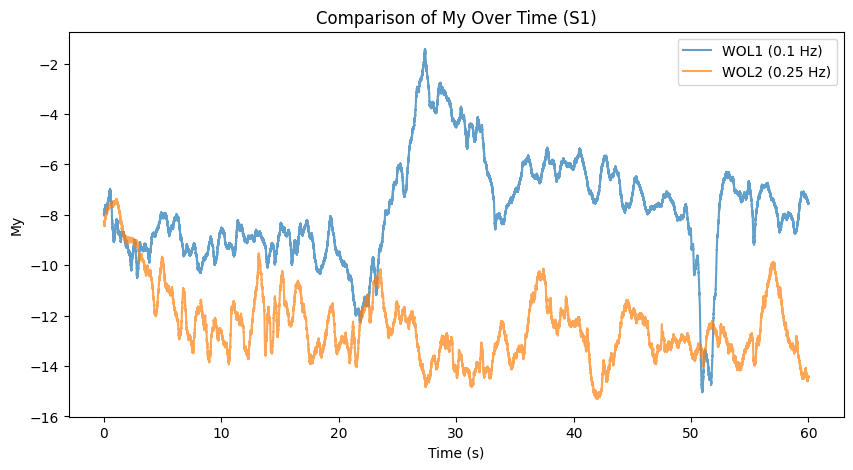

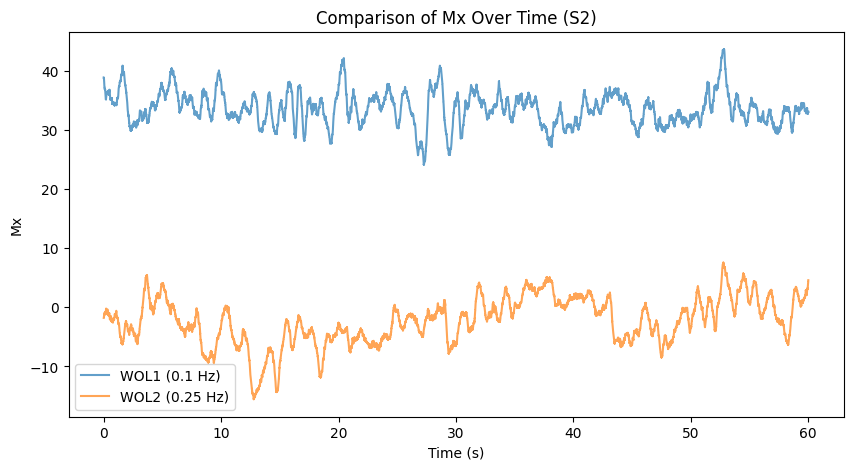

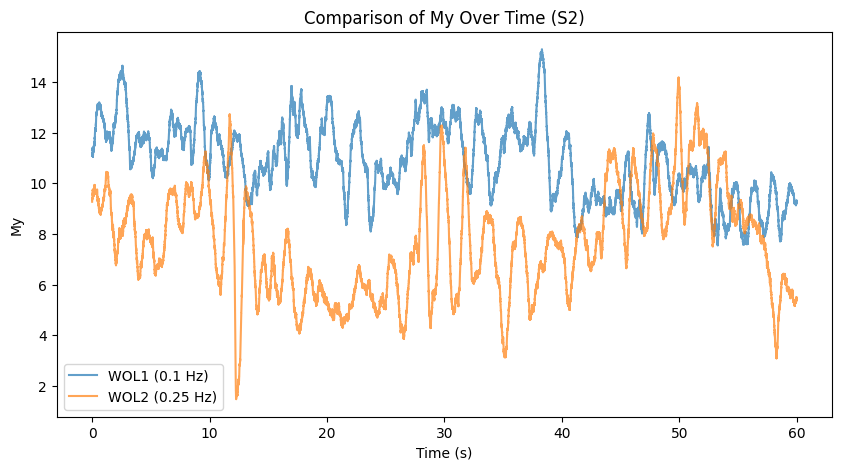

In [38]:
# Mx (medial-lateral torque)
plt.figure(figsize=(10, 5))
plt.plot(wol1_s1["Time"], wol1_s1["Mx"], label="WOL1 (0.1 Hz)", alpha=0.7)
plt.plot(wol2_s1["Time"], wol2_s1["Mx"], label="WOL2 (0.25 Hz)", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Mx")
plt.title("Comparison of Mx Over Time (S1)")
plt.legend()
plt.show()

# My (anterior-posterior torque)
plt.figure(figsize=(10, 5))
plt.plot(wol1_s1["Time"], wol1_s1["My"], label="WOL1 (0.1 Hz)", alpha=0.7)
plt.plot(wol2_s1["Time"], wol2_s1["My"], label="WOL2 (0.25 Hz)", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("My")
plt.title("Comparison of My Over Time (S1)")
plt.legend()
plt.show()

# Mx (medial-lateral torque)
plt.figure(figsize=(10, 5))
plt.plot(wol1_s2["Time"], wol1_s2["Mx"], label="WOL1 (0.1 Hz)", alpha=0.7)
plt.plot(wol2_s2["Time"], wol2_s2["Mx"], label="WOL2 (0.25 Hz)", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("Mx")
plt.title("Comparison of Mx Over Time (S2)")
plt.legend()
plt.show()

# My (anterior-posterior torque)
plt.figure(figsize=(10, 5))
plt.plot(wol1_s2["Time"], wol1_s2["My"], label="WOL1 (0.1 Hz)", alpha=0.7)
plt.plot(wol2_s2["Time"], wol2_s2["My"], label="WOL2 (0.25 Hz)", alpha=0.7)
plt.xlabel("Time (s)")
plt.ylabel("My")
plt.title("Comparison of My Over Time (S2)")
plt.legend()
plt.show()

could have an option for users to select which subject to look at and the plot changes dynamically or users can also choose to look at them all at once in a normalized graph

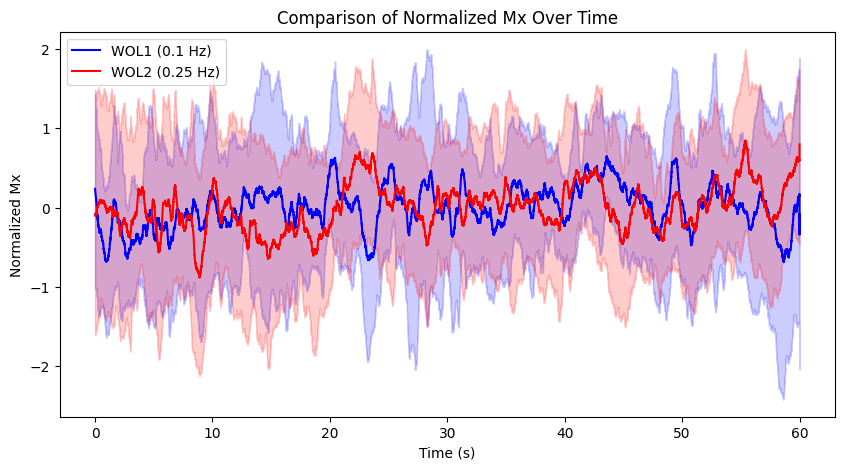

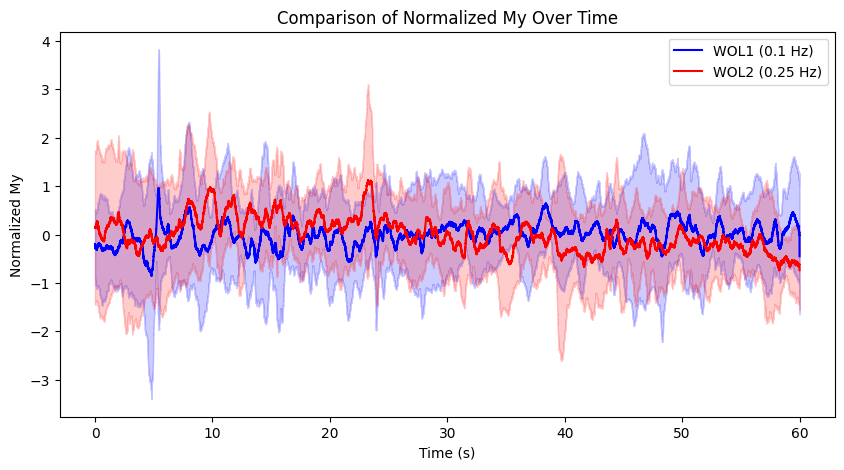

In [34]:
subject_folders = glob.glob("../data/S*")
wol1_all = []
wol2_all = []

for folder in subject_folders:
    wol1_path = os.path.join(folder, "WOL1.csv")
    wol2_path = os.path.join(folder, "WOL2.csv")
    
    wol1 = pd.read_csv(wol1_path)
    wol2 = pd.read_csv(wol2_path)
    
    for col in ["Mx", "My"]:
        wol1[col] = (wol1[col] - wol1[col].mean()) / wol1[col].std()
        wol2[col] = (wol2[col] - wol2[col].mean()) / wol2[col].std()
    
    wol1_all.append(wol1)
    wol2_all.append(wol2)

wol1_combined = pd.concat(wol1_all, ignore_index=True)
wol2_combined = pd.concat(wol2_all, ignore_index=True)

wol1_mean = wol1_combined.groupby("Time")[["Mx", "My"]].mean()
wol1_std = wol1_combined.groupby("Time")[["Mx", "My"]].std()
wol2_mean = wol2_combined.groupby("Time")[["Mx", "My"]].mean()
wol2_std = wol2_combined.groupby("Time")[["Mx", "My"]].std()

# mean and variability of Mx
plt.figure(figsize=(10, 5))
plt.plot(wol1_mean.index, wol1_mean["Mx"], label="WOL1 (0.1 Hz)", color="blue")
plt.fill_between(wol1_mean.index, wol1_mean["Mx"] - wol1_std["Mx"], wol1_mean["Mx"] + wol1_std["Mx"], color="blue", alpha=0.2)

plt.plot(wol2_mean.index, wol2_mean["Mx"], label="WOL2 (0.25 Hz)", color="red")
plt.fill_between(wol2_mean.index, wol2_mean["Mx"] - wol2_std["Mx"], wol2_mean["Mx"] + wol2_std["Mx"], color="red", alpha=0.2)

plt.xlabel("Time (s)")
plt.ylabel("Normalized Mx")
plt.title("Comparison of Normalized Mx Over Time")
plt.legend()
plt.show()

# mean and variability of My
plt.figure(figsize=(10, 5))
plt.plot(wol1_mean.index, wol1_mean["My"], label="WOL1 (0.1 Hz)", color="blue")
plt.fill_between(wol1_mean.index, wol1_mean["My"] - wol1_std["My"], wol1_mean["My"] + wol1_std["My"], color="blue", alpha=0.2)

plt.plot(wol2_mean.index, wol2_mean["My"], label="WOL2 (0.25 Hz)", color="red")
plt.fill_between(wol2_mean.index, wol2_mean["My"] - wol2_std["My"], wol2_mean["My"] + wol2_std["My"], color="red", alpha=0.2)

plt.xlabel("Time (s)")
plt.ylabel("Normalized My")
plt.title("Comparison of Normalized My Over Time")
plt.legend()
plt.show()
